In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch import optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision.datasets import mnist
from torchvision import transforms
import matplotlib.pyplot as plt

In [ ]:
class Net(nn.Module):
    def __init__(self, in_c=784, out_c=10):
        super(Net, self).__init__()

        # 定義全連接層
        self.fc1 = nn.Linear(in_c, 512)
        
        # 定義激活層
        self.act1 = nn.ReLU(inplace=True)

        # Second
        self.fc2 = nn.Linear(512, 256)
        self.act2 = nn.ReLU(inplace=True)

        # Third
        self.fc3 = nn.Linear(256,128)
        self.act3 = nn.ReLU(inplace=True)

        # out
        self.fc4 = nn.Linear(128,out_c)

    def forward(self, x):
        x = self.act1(self.fc1(x))
        x = self.act2(self.fc2(x))
        x = self.act3(self.fc3(x))
        x = self.fc4(x)

        return x


In [13]:
net = Net()

# 訓練集
train_set = mnist.MNIST("./data/", train=True,
                        transform=transforms.ToTensor(), download=True)

# 測試集
test_set = mnist.MNIST("./data/", train=False,
                       transform=transforms.ToTensor(), download=True)
                       
# 訓練集載入器
train_data = DataLoader(train_set, batch_size=64, shuffle=True)

# 測試集載入器
test_data = DataLoader(test_set, batch_size=128, shuffle=False)


Using downloaded and verified file: ./MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Using downloaded and verified file: ./MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Using downloaded and verified file: ./MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Using downloaded and verified file: ./MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



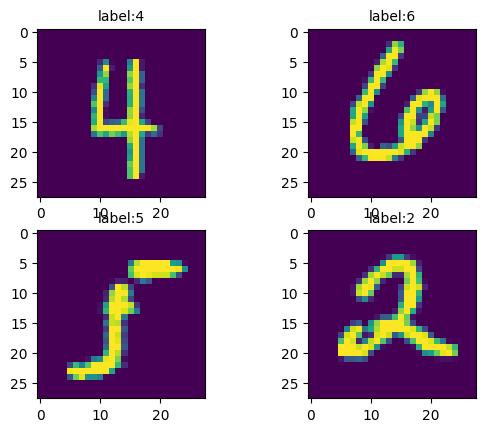

In [14]:
import random
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    idx = random.randint(0, len(train_set))
    digit_0 = train_set[idx][0].numpy()
    digit_0_image = digit_0.reshape(28, 28)
    ax.imshow(digit_0_image, interpolation="nearest")
    ax.set_title("label:{}".format(train_set[idx][1]), fontsize = 10, color="black")
plt.show()


In [15]:
# 定義損失函數 -- 交叉熵
criterion = nn.CrossEntropyLoss()

# 定義優化器 -- 隨機梯度下降
optimizer = optim.SGD(net.parameters(), lr=1e-2,weight_decay=5e-4)

In [27]:
# 開始訓練
# 記錄訓練損失
losses = []
# 記錄訓練精度
acces = []
# 記錄測試損失
eval_losses = []
# 記錄測試精度
eval_acces = []
# 迭代次數
nums_epoch = 60

In [28]:
for epoch in range(nums_epoch):
    train_loss = 0
    train_acc = 0
    net = net.train()
    for batch, (img, label) in enumerate(train_data):
        img = img.reshape(img.size(0), -1)
        img = Variable(img)
        label = Variable(label)

        #向前傳播
        out = net(img)
        loss = criterion(out,label)
        
        #反向傳播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #記錄誤差
        train_loss += loss.item()

        #計算分類的準確率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct/img.shape[0]
        if (batch + 1)% 200 == 0:
            print(f"[INFO] Epoch-{epoch+1}-Batch-{batch+1}: Train: Loss-{loss.item():.4f}, Accuracy-{acc:.4f}")

        train_acc += acc

    losses.append(train_loss/len(train_data))
    acces.append(train_acc/len(train_data))
    eval_loss = 0
    eval_acc = 0

    # 測試集不訓練
    for img, label in test_data:
        img = img.reshape(img.size(0),-1)
        img = Variable(img)
        label = Variable(label)
        
        out = net(img)
        loss = criterion(out,label)

        # 記錄誤差
        eval_loss += loss.item()

        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()

        eval_acc += acc
    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))

    print('[INFO] Epoch-{}: Train: Loss-{:.4f}, Accuracy-{:.4f} | Test: Loss-{:.4f}, Accuracy-{:.4f}'.format(
        epoch + 1, train_loss / len(train_data), train_acc / len(train_data), eval_loss / len(test_data),
        eval_acc / len(test_data))) 

[INFO] Epoch-1-Batch-200: Train: Loss-0.1505, Accuracy-0.9531
[INFO] Epoch-1-Batch-400: Train: Loss-0.0487, Accuracy-0.9844
[INFO] Epoch-1-Batch-600: Train: Loss-0.1520, Accuracy-0.9375
[INFO] Epoch-1-Batch-800: Train: Loss-0.0627, Accuracy-0.9688
[INFO] Epoch-1: Train: Loss-0.0924, Accuracy-0.9739 | Test: Loss-0.1026, Accuracy-0.9688
[INFO] Epoch-2-Batch-200: Train: Loss-0.0538, Accuracy-0.9688
[INFO] Epoch-2-Batch-400: Train: Loss-0.2659, Accuracy-0.9219
[INFO] Epoch-2-Batch-600: Train: Loss-0.0891, Accuracy-0.9688
[INFO] Epoch-2-Batch-800: Train: Loss-0.1630, Accuracy-0.9375
[INFO] Epoch-2: Train: Loss-0.0874, Accuracy-0.9752 | Test: Loss-0.1005, Accuracy-1.0000
[INFO] Epoch-3-Batch-200: Train: Loss-0.0522, Accuracy-0.9844
[INFO] Epoch-3-Batch-400: Train: Loss-0.2233, Accuracy-0.9531
[INFO] Epoch-3-Batch-600: Train: Loss-0.0302, Accuracy-1.0000
[INFO] Epoch-3-Batch-800: Train: Loss-0.0782, Accuracy-0.9531
[INFO] Epoch-3: Train: Loss-0.0829, Accuracy-0.9765 | Test: Loss-0.0974, Accur

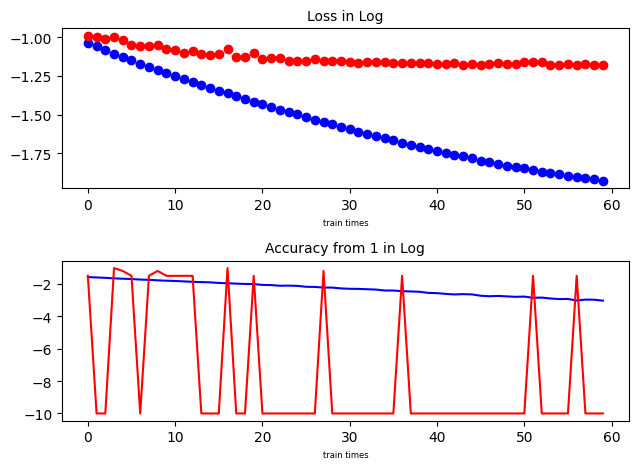

In [55]:
def error_acc(x):
    if x == 1:
        return -10
    else:
        return log(1-x)

from math import log10 as log
loss = plt.subplot(2, 1, 1)
loss.plot([log(i) for i in losses], "bo")
loss.plot([log(i) for i in eval_losses],"ro")
loss.set_title("Loss in Log",fontsize=10, color = "black")
loss.set_xlabel("train times", fontsize=6)
accuracy = plt.subplot(2, 1, 2)
accuracy.plot([log(1-i) for i in acces], "b")
accuracy.plot([error_acc(i) for i in eval_acces], "r")
accuracy.set_title("Accuracy from 1 in Log",fontsize=10, color = "black")
accuracy.set_xlabel("train times", fontsize=6)
plt.tight_layout()
plt.show()
